<font size=14>[Cartopy](https://scitools.org.uk/cartopy/docs/latest/):**把数据画在地图上**</font> <img src="pics/cartopy/cartopylogo.png" align="right" width=25%>


<div align='center'><img src="pics/库层.png" width=80%></div>

# 二维等值线分析Contour
之前绘制的都是一维的图像，即因变量随着自变量的变化。在这过程中，也学习了Matplotlib的画布管理、绘图区方法等，实现了双Y轴、多Y轴、一页多图、共享X轴图形的绘制。

- 相同格点值连接成为等值线。
- 一侧高于一侧。
- 不同等值线不能交叉。
- 某个要素 随两个自变量的变化 → 空间(水平、垂直、倾斜……)分布
     1. 某个点的值大小（高低温）
     2. 某个维度上的分布（南暖北冷）
     3. 两个维度上的分布（梯度等）
     
```python
matplotlib.pyplot.contour([X, Y,] Z, [levels], **kwargs)常用的参数：

'''
    [X, Y,] Z：在变量当中，tmp实际上已经是一个73×144的数组。在官方文档说明中，横纵坐标建议均为和tmp（N，M）d(lon,lat)即可创建网格化的横纵坐标网lons,lats，传递进contour(lons,lat,tmp)。也可为一维数组，横轴lon的长度为N，纵轴lat的长度为M。这两种方法绘制结果相同。如果不传递lon和lat，直接使用contour(tmp)也可绘制相同的图形，但横纵坐标均会变成维度的索引（0-144,0-73），而不是之前的（0~360°，-90~90°）。
    colors：线条颜色
    levels：整数n或类似数组。决定绘制线条的数量n，或者决定分析线条的值。等值线分析间隔，或者说分析值序列应当尽量遵循业务规范，或者根据实际情况按照科学分析常用的1、2、4、5、8、10、100……作为间隔。
    cmap：当colors未被指定时。采用默认或指定的色彩映射colormap，绘制彩色的等值线。默认colormap为'viridis'。与色彩映射有关的参数norm、vmin、vmax将在5.2.3中详细讲解。
'''

matplotlib.pyplot.clabel(**kwargs)：
'''
    CS：绘制等值线的返回值ContourSet
    levels：需要标注的值，必须是cs.levls的子集或全集。如果未被定义，则全部标注。
    fontsize：数字字号。或者表示相对字号的字符串：'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'。
    colors：默认为对应的等值线颜色。也可统一颜色。
    inline：默认嵌入，对应标注位置的下层的等值线会被清除。
    inline_spacing：标注嵌入的宽度（像素），默认为5。这种间距对于等高线笔直的位置的标签是准确的，对于曲线等高线上的标签则更少。
    fmt：格式说明符，默认是'%1.3f'。
    manual：当为True是，在可交互界面（如IDLE编辑器）中，可以在需要添加标注的等值线位置单击鼠标左键，则添加对应等值线的标注。单击鼠标中键结束。
    rightside_up：默认为True，标注始终为正向。
    use_clabeltext：如果为True，则使用ClabelText类（而不是Text）创建标签。ClabelText在绘图期间重新计算文本的旋转角度，因此，如果绘图区的角度发生变化，则可以使用此功能。默认值为False。
'''
```

In [ ]:
## 引用部分
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 打开ERA5 hourly data on pressure levels from 1979 to present数据，文件格式为GRIB1
ds = xr.open_dataset('data/ERA5-20210720.grib')#,engine = 'cfgrib')
ds

In [ ]:
valid = "2021-07-20T08:00:00.000000000"
tmp = ds.t.sel(time = valid, isobaricInhPa=850) - 273.15
lat = ds['latitude']
lon = ds['longitude']
plt.imshow(tmp)   #注意Y轴的方向

In [ ]:
tmp

In [ ]:
## 绘制图形
fig = plt.figure(figsize=(9,6),dpi=200)                   #画布第一
ax = fig.add_axes([0.05,0.05,0.9,0.9])          #绘图区声明

#绘制等温线
'''
    [X, Y,] Z：在变量当中，tmp实际上已经是一个73×144的数组。在官方文档说明中，横纵坐标建议均为和tmp（N，M）有相同维度的二维数据，通过代码第12行np.meshgrid(lon,lat)即可创建网格化的横纵坐标网lons,lats，传递进contour(lons,lat,tmp)。也可为一维数组，横轴lon的长度为N，纵轴lat的长度为M。这两种方法绘制结果相同。如果不传递lon和lat，直接使用contour(tmp)也可绘制相同的图形，但横纵坐标均会变成维度的索引（0-144,0-73），而不是之前的（0~360°，-90~90°）。
    colors：线条颜色
    linewidths: [ None | number | tuple of numbers ]：等值线宽度
    linestyles: [ None | 'solid' | 'dashed' | 'dashdot' | 'dotted' ]
    levels：整数n或类似数组。决定绘制线条的数量n，或者决定分析线条的值。等值线分析间隔，或者说分析值序列应当尽量遵循业务规范，或者根据实际情况按照科学分析常用的1、2、4、5、8、10、100……作为间隔。
    cmap：当colors未被指定时。采用默认或指定的色彩映射colormap，绘制彩色的等值线。默认colormap为'viridis'。与色彩映射有关的参数norm、vmin、vmax将在5.2.3中详细讲解。
'''
# cs = ax.contour(tmp, levels=np.arange(-32,32,4), colors='r', linewidths=1, alpha=0.8)      #问题：0-321   0-281 而且南北反向。
# cs = ax.contour(lon, lat, tmp, levels=np.arange(-32,32,4), colors='r', linewidths=1, alpha=0.8) 
cf = ax.contourf(lon, lat, tmp, levels=np.arange(0,41,4),cmap='jet' ,alpha=0.8)    #更符合“ 40°N，120°E的温度是-8.5℃ ”的客观认知。

# #添加等温线标注
# ax.clabel(cs, cs.levels, fontsize=10, colors='k',inline=1, inline_spacing=8, fmt='%i°C', rightside_up=True, use_clabeltext=True)

## 显示输出
plt.show()


In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
jet = cm.get_cmap('jet',10)
jet

以上图形的绘制都是在**笛卡尔直角坐标系**上的。这张图用作分析天气系统等已经足够，但距离“天气图”还差一步。
- 只是在横轴坐标120，纵轴坐标40的空间位置上，数值是20.5。
- 比如：全球气象数据是180°W到180°E的，如果直接使用matplotlib绘制，直角坐标系中则对应(0,360)，缺少识读准确性。
- 再如：想要更清晰的叠加其他与 地理坐标有关系的 数据（雷达、卫星、闪电定位、地形、行政区划地理信息……），肯定不能都向`笛卡尔坐标`靠拢。
- 气象数据多数是与地理位置有关的。在地理信息系统中，使用地理坐标系（Geographic coordinate system）进行定位，用地理经纬度表示地球表面上点位的空间坐标系，常见的单位有度、分、秒、度分秒。 
- 如果想在平面图上完成具备地理信息的气象数据的处理绘图，就需要将经纬度坐标转换为投影坐标（x-y）。

---

概括一句话：把天气图绘制在【带有投影】的底/地图上

<img src="pics/cartopy/天气图底图.jfif"  width=60%><img src="pics/cartopy/CRS信息.png"  width=30%> 


- 单纯的使用matplotlib无法与地球坐标相对应，也无法叠加地图等地理信息。
- 需要使用basemap或者cartopy进行坐标转换进而完成图形绘制及地理信息显示。

Basemap Matplotlib Toolkit用于在python中绘制地图上的二维数据。 <img src="pics/cartopy/basemap.png" align="right" width=25%>
 
   - 它的功能类似于MATLAB映射工具箱、IDL映射工具、GrADS或通用映射工具。PyNGL和CDAT是在python中提供类似功能的其他库。
   - Basemap本身不进行任何绘图，但提供了将坐标转换为25个不同地图投影之一的功能（使用proj.4c库）。然后，Matplotlib用于绘制转换坐标中的轮廓、图像、向量、线或点。提供了海岸线、河流和区域边界数据集（来自通用绘图工具），以及绘制它们的方法。地理库内部用于将海岸线和极性边界特征裁剪到所需的地图投影区域。
   - 地图的绘制是为了满足地球科学家，特别是海洋学家和气象学家的需要。Jeff Whitaker最初编写Basemap是为了帮助他的研究（气候和天气预报），因为当时CDAT是Python中绘制地图预测数据的唯一其他工具。多年来，随着其他学科（如生物学、地质学和地球物理学）科学家的要求和贡献，Basemap的能力不断发展。
   - 从2016年开始，Basemap接受了新的管理。Cartopy项目将取代Basemap，但它还没有实现Basemap的所有功能。所有新的软件开发都应该尽可能地使用cartopy，现有的软件应该开始转换为使用cartopy的过程。所有的维护和开发工作都应该集中在Cartopy上。
   - 本·鲁特自愿承担到2020年的地图维护工作。继续审查请求，并修复错误，确保与numpy和matplotlib等包兼容。当最后一个python 2.7更新在2020年正式发布时，将发布最后一个Basemap(2020年8月7日Final Release 1.6.1版本)，并结束支持。
   - 官方也推荐转向`Cartopy`

# Cartopy <img src="pics/cartopy/cartopylogo.png" align="right" width=25%>

使用Cartopy作为制图包（Cartography制(地)图学）。Cartopy提供了多种投影和地理信息处理方法。

    Cartopy（源自**Carto**graphy制(地)图学）是一个为地理空间数据处理而设计的python包，用于生成地图和其他地理空间数据分析。
    Cartopy利用了强大的PROJ.4、NumPy和Shapely库，并包括一个基于Matplotlib的编程接口，用于创建出版级质量的地图。
    Cartopy的主要特点是其面向对象的投影定义，以及在这些投影之间转换点、线、向量、多边形和图像的能力。


## 把数据画在地图上

In [ ]:
import cartopy.crs as ccrs

## 绘制图形
proj = ccrs.PlateCarree()             #源投影方式：数据所具备的投影方式
fig = plt.figure(figsize=(9,6))       #画布第一
ax = fig.add_axes([0.05,0.05,0.9,0.9], projection = proj)      #带有投影的 绘图区声明
ax.set_extent([70,150,0,70])
cs = ax.contour(lon, lat, tmp,         transform = proj,
                levels=np.arange(-32,32,4), colors='r', linewidths=1, alpha=0.8)    #更符合“ 40°N，120°E的温度是-8.5℃ ”的客观认知。
#添加等温线标注
ax.clabel(cs, cs.levels, fontsize=10, colors='k',inline=1, inline_spacing=8, fmt='%i°C', rightside_up=True, use_clabeltext=True)
ax.gridlines(crs=proj,ylocs=np.arange(-10,90,10),xlocs=np.arange(0,190,5),draw_labels=False,linestyle='--',alpha=0.7)
ax.set_xticks(np.arange(70,160,10))
ax.set_yticks(np.arange(0,80,10),crs=proj)
ax.coastlines()

## 显示输出
plt.show()

In [ ]:
type(ax)   #定义了projection投影的绘图区是标准axes类的子类 —— GeoAxes。多数方法一致，涉及到投影的被重载了

## **工作原理**
  1. 绘图区声明时，使用`projection`关键字，定义投影 ---<font color='red'>**目标投影**</font>
  2. 在绘制图形时，使用`transform`关键字，进行投影转换 ---告知绘图区数据的<font color='green'>**源投影**</font>
  
<center>projection定义了绘制图形结果的投影方式。transform则告知了Cartopy数据被定义在什么坐标系统中。</center>

In [ ]:
##引用部分
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

fig=plt.figure(figsize=(12, 6))
# projection关键字决定出图的投影方式
ax1 = fig.add_subplot(221,projection=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.contour(lon, lat, data)  # 看似未被转换

# 数据在lat/lon坐标系当中被定义，所以选择PlateCarree()
data_crs = ccrs.PlateCarree()
ax2 = fig.add_subplot(222,projection=ccrs.PlateCarree())
ax2.set_global()
ax2.coastlines()
ax2.contour(lon, lat, data, transform=data_crs) # 进行转换

# 如果投影方式为旋转极地
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax3 = fig.add_subplot(223,projection=projection)
ax3.set_global()
ax3.coastlines()
ax3.contour(lon, lat, data)  # 未被转换

# 投影方式仍选择旋转极地
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax4 = fig.add_subplot(224,projection=projection)
ax4.set_global()
ax4.coastlines()
ax4.contour(lon, lat, data, transform=data_crs)  # 进行转换

plt.show()

## 投影方式

等经纬度投影：
```python
PlateCarree(central_longitude=0.0)
```
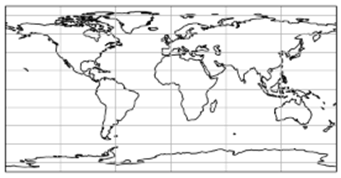

兰勃托投影：
```python
LambertConformal(central_longitude=-96.0, central_latitude=39.0, false_easting=0.0, false_northing=0.0, secant_latitudes=None, standard_parallels=None, globe=None, cutoff=-30)
```
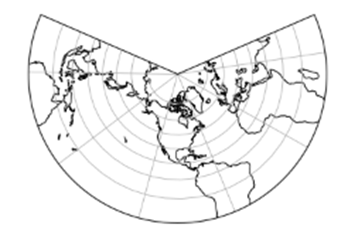


墨卡托投影：
```python
Mercator(central_longitude=0.0, min_latitude=-80.0, max_latitude=84.0, globe=None, latitude_true_scale=None, false_easting=0.0, false_northing=0.0, scale_factor=None)
```
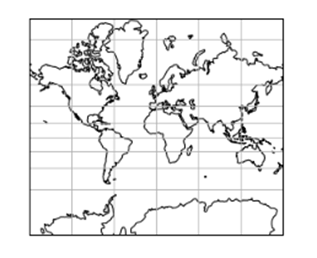

正射方位投影：Orthographic

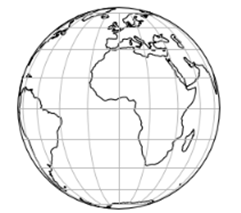

近静止卫星投影：Geostationary

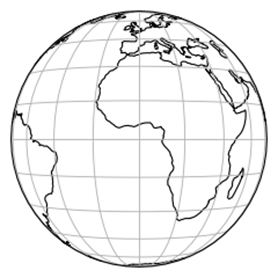

罗宾逊投影：Robinson

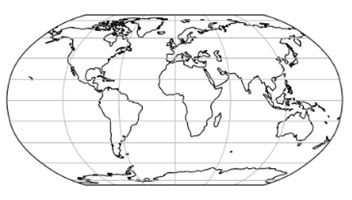

北极球面投影：NorthPolarStereo

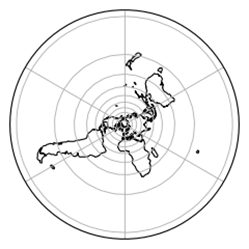

当前只有等经纬度PlateCarree、米勒Miller、墨卡托Mercartor、圆柱兰勃托LambertCylindrical四种投影可以直接使用ax.set_xticks/yticks显示坐标轴标签。

Lambert投影的坐标轴刻度比较特殊，详见5.1.3.2

# 等值线填色分析与风场

## 等值线填色 
    色斑图，也称阴影图，从科学图形分类上来看应该称为contour filled “等值线填色图”，更为确切。

   - 它是在等值线分析的基础上，将等值线之间的z区域（ $z_1<Z≤z_2$ ）用不同颜色填充起来。
   - 等值线分析是基础，但是同样的线条颜色、线宽，想要区分大小，可能需要去看标注值clabel。
   - 色彩给人视觉的信息更直接，颜色填充后，根据色标（尤其是根据业务规范规定的色阶），可以很轻松的判别大小、高低、冷暖、强弱。比如
       * 温度分布，暖空气-红色与冷空气-蓝色之间颜色密集区域就是锋区。
       * 雷达图像的径向速度图上红色表示出流，绿色入流，颜色越深，径向速度越大。
       * 24小时降水落区，根据既定的色标，可以判读降水落区（没有颜色的就是无雨区）、雨带走向、降水强弱（蓝色-大雨；深蓝色：暴雨…）。

```python
matplotlib.pyplot.contouf([X, Y,] Z, [levels], **kwargs)  
   可传递的参数与contour一样
   与MATLAB当中的contouf()不同的是，Python当中的只绘制填色部分，不绘制等值线，因此添加绘制黑色等值线的代码。
```

### 等值线填色

In [ ]:
valid = "2021-07-20T08:00:00.000000000"
tmp = ds.t.sel(time = valid, isobaricInhPa=850) - 273.15
lat = ds['latitude']
lon = ds['longitude']

In [ ]:
## 绘制图形
proj = ccrs.PlateCarree()             #源投影方式：数据所具备的投影方式
fig = plt.figure(figsize=(9,6),dpi=300)       #画布第一
ax = fig.add_axes([0.05,0.05,0.9,0.9], projection = ccrs.LambertConformal(central_longitude=120,central_latitude=30.) )     #带有投影的 绘图区声明
cs = ax.contourf(lon, lat, tmp,       transform = proj,levels=np.arange(-30 ,40 ,1),cmap='jet',  alpha=0.8)   
# pc = ax.pcolormesh(lon, lat, tmp,       transform = proj,cmap='jet',  alpha=0.8)  
# cs = ax.contour(lon, lat, tmp,       transform = proj,levels=np.arange(-30 ,35 ,1),color='r',  alpha=0.8)    
#添加
ax.gridlines(crs=proj,ylocs=np.arange(-10,90,10),xlocs=np.arange(0,190,5),draw_labels=False,linestyle='--',alpha=0.7)
ax.coastlines()
ax.set_extent([80,145,10,60])
## 显示输出………………先绘制全部数据，再缩放到所需范围。【如果是全球数据会有点慢，可以进行数据切片，减少渲染量。
plt.show()

练习：500hPa垂直速度，只填色显示负值（上升运动）

In [ ]:
omega = ds.w.sel(time="2021-07-20T08:00:00.000000000", isobaricInhPa=850,longitude=np.arange(70,140,0.25),latitude=np.arange(0,70,0.25))
omega

In [ ]:
## 绘制图形
proj = ccrs.PlateCarree()             #源投影方式：数据所具备的投影方式
fig = plt.figure(figsize=(9,6))       #画布第一
ax = fig.add_axes([0.05,0.05,0.9,0.9], projection = ccrs.LambertConformal(central_longitude=120,central_latitude=30.) )     #带有投影的 绘图区声明
ax.contourf(omega.longitude, omega.latitude, omega, transform = proj,levels=np.arange(-7 ,0 ,0.5),cmap='bwr', alpha=0.8)
#添加
ax.coastlines()
ax.set_extent([105,125,30,40])

## 显示输出
plt.show()

### 谈谈色彩映射colormap

- 前文提到，色彩是相较于等值线分析更直观的数据可视化形式。
- 从计算机角度出发，色彩本身就是RGB、RGBA、ARGB。
- 之前俗称“色标”、“色阶”、“调色板”的，在MATLAB和Matplotlib中都是色彩color映射map
- [matplotlib内置的一些色彩映射](https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html)。Metpy中也有一些专业层面的（可见光、水汽、雷达Z、V、SW、降水……）
  - 可以根据需要选择不同*排列类型*的色彩映射
  - 在任何使用色彩映射的地方，cmap='name'即可
  - name_r代表反序
  - 如未指定，默认cmap为'viridis'翠绿色
  - [*如何选择colormap：亮度的故事*](https://matplotlib.org/3.4.2/tutorials/colors/colormaps.html)
  
<img src='pics/matplotlib/colormaps.png' width=60%><img src='pics/metpy/Metpycolormaps.png' width=40%>


#### [创建自己的](https://matplotlib.org/3.4.2/tutorials/colors/colormap-manipulation.html)Colormap

从外面看，两个colormap类都将0到1之间的值映射为一组颜色，但有细微差别。

* 降水量级[0,10,25,50,100,250]对应的颜色有明确业务规范。
* 冷空气用冷色调（蓝色），暖空气用暖色调（红色）。
* 高的值用黑色，低的值用白色（比如云图）。


##### 访问colormap获取RGB数值

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 8)
type(viridis)

In [ ]:
viridis.colors

In [ ]:
print(viridis(0.7))    #返回最近的RGBA值

In [ ]:
print('viridis.colors', viridis.colors)
print('viridis(range(8))', viridis(range(8)))
print('viridis(np.linspace(0, 1, 8))', viridis(np.linspace(0, 1, 8)))

可以通过这种方法截取部分。'viridis'是Listedcolomap，对于bwr这种LinearSegmentedColormap，如下——

In [ ]:
mycmap = cm.get_cmap('bwr', 16)
mycmap

截取色彩映射部分

In [ ]:
mycmap = cm.get_cmap('bwr', 16)   #bwr的类型是LinearSegmentedColormap，而非ListedColormap
colorList = [mycmap(i/mycmap.N) for i in np.arange(mycmap.N/2)]
colorList

In [ ]:
newcmap = LinearSegmentedColormap.from_list(name='newcmap',colors=colorList,N=8)
newcmap

“超采样”出现重复

In [ ]:
print('viridis(np.linspace(0, 1, 12))', viridis(np.linspace(0, 1, 12)))

##### 创建一个ListedColormap

任何matplotlib接受的color形式均可

例：由Hex-RGB字符串创建【见6.2节 离散点填图，对于24小时降水的色彩映射】

In [ ]:
import matplotlib.colors as colors
cdict = ['#A6F28F', '#3DBA3D', '#61B8FF', '#0000FF', '#FA00FA', '#800040']#自定义颜色列表
my_cmap=colors.ListedColormap(cdict)#自定义颜色映射color-map
my_cmap

##### 创建一个LinearSegmentedColormap

In [ ]:
# 本notebook中无法运行。见 卫星 44-Satellite.ipynb
mpl.colors.LinearSegmentedColormap('my_colormap', awx.IR, 256)

#### 标准化：与数值范围建立关系

- 任何情况下，使用一个colormap，它会与所绘制数据的范围自动匹配。
   - 比如全球的850hPa温度可能是-40至36℃范围，则colormap的最大/红对应36，最小/蓝对应-40；
   - 但如果只绘制华北地区的，大概28-30℃，则出现的色彩对比就不会很明显。
- 也可以这样理解，默认的色彩映射与数值范围无关，比如上面的24小时降水，就是个“色彩列表”而已。
- 需要进行`标准化`：基于离散间隔创建色彩映射整数索引。

```python
matplotlib.colors.BoundaryNorm(boundaries, ncolors, clip=False, *, extend='neither')

'''
extend{'neither', 'both', 'min', 'max'}, default: 'neither'  本例中7个数值 → 都不拓展 → 6个区间 →6个颜色
'''
```

In [ ]:
# 色彩定制：24小时降水量级色标  详见“21-科学分析方法的Python实现”一节
clevs = [0.0,10.,25.,50.,100.,250.,500]#自定义颜色列表
cdict = ['#A6F28F', '#3DBA3D', '#61B8FF', '#0000FF', 
'#FA00FA', '#800040']#自定义颜色列表
my_cmap=colors.ListedColormap(cdict)#自定义颜色映射color-map
norm = colors.BoundaryNorm(clevs, my_cmap.N) #基于离散区间生成颜色映射索引
norm
# cf=ax.contourf(olon,olat,rain_data_new,clevs,transform=ccrs.PlateCarree(),
#                ###cmap=my_cmap, norm = norm###)

mpl.colors.Normalize 映射到[0, 1]之间

In [ ]:
proj = ccrs.PlateCarree()             #源投影方式：数据所具备的投影方式
fig = plt.figure(figsize=(9,6),dpi=100)       #画布第一
ax = fig.add_axes([0.05,0.05,0.9,0.9], projection = ccrs.PlateCarree() )     #带有投影的 绘图区声明
clevs=np.arange(-40,40,1)

import matplotlib as mpl
##色彩映射使用与标准化
norm = mpl.colors.Normalize(vmin=2,vmax=32)        
cf= ax.contourf(lon,lat,tmp,clevs, transform=proj, norm=norm)    #默认使用的是viridis
# cs= ax.contour(lon,lat,tmp,clevs[::2],colors='k', transform=proj)    #默认使用的是viridis
# ax.clabel(cs)
plt.show()

---
---
## 风场的三种形态
风羽barb、流线streamplot、风矢quiver *动态流线*

m/s  or  kont

![SegmentLocal](pics/cartopy/wind.gif "segment") 

### 风羽

在气象学中，“风羽”一词指的是风向风速标识符上表示风速大小的长短杆或三角，表示风向的称为“风向杆”。本节中，以“风羽”来指代风向风速标识符。

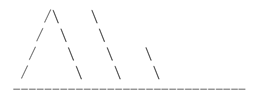
```python
ax.barbs(lons,lats,u, v, transform=proj,
         linewidth=0.5,flagcolor='k',linestyle='-',length=5,
         pivot='tip',barb_increments=dict(half=2, full=4, flag=20),
         sizes=dict(spacing=0.15,height=0.5,width=0.12),
         fill_empty=True,
         flip_barb=False)
    '''
    [x,y,u,v]：即经度、纬度、u分量、v分量
	pivot：中心点，绘制风羽的中心点，{'tip', 'middle'} ，默认为顶端。
	barb_increments：风羽增量，默认为5,10,50,单位为节。字典型，这里定义half=2，full=4，flag=20，意味着半行代表2m/s，整行4m/s，三角形20m/s
	sizes：风羽的大小，字典值，风羽之间的间隔、高度、宽度。
	fill_empty：当风速不足2m/s时，在该点位置绘制空心圆。如果为False，该点视作无数据（透明）。
	flip_barb：翻转风羽，当绘制南半球风场时使用。
	barbcolor：风羽的颜色。
	flagcolor：三角形的颜色。
    '''
```

In [ ]:
ds

In [ ]:
u = ds.u.sel(time=valid ,isobaricInhPa = 500)
v = ds.v.sel(time=valid ,isobaricInhPa = 500)
hgt = ds.z.sel(time=valid ,isobaricInhPa = 500)/9.8*0.1

In [ ]:
hgt

In [ ]:
lon

1. 由于资料分辨率为0.25°，选择中国区域范围内数据较多，风羽太大则会重叠，太小便无法清晰识读风速大小。可以在传递基本参数时进行抽稀操作，例如 lons[::step,::step]，这样就会每2.5°绘制一个风羽
2. <font color='red'> **!!! 绘制风场时，传递u和v尽量是ndarray类型，本例中u.data取。目前看xarray.Dataarray不支持【报错AttributeError: 'DataArray' object has no attribute 'ravel'】** </font>
3. matplotlib设计上对于不足半个风羽half，也就是2m/s的风场不做绘制或以空心圆替代，但是同时该点的风向信息就被消隐了。可以通过修改matplotlib自带的barbs方法，将风场的风向表示出来(见《Python气象资料处理与可视化》5.4.1节)

In [ ]:
proj = ccrs.PlateCarree()
fig=plt.figure(figsize=(9,9))                   #声明画布
ax = plt.axes([0.1,0.1,0.8,0.8], projection=ccrs.LambertConformal(central_longitude=120,central_latitude=45.))      #添加！带投影！的绘图区

lons,lats =np.meshgrid(u.longitude,u.latitude)  #网格化
region=[85,155,20,60]                           #要绘制的范围lon1,lon2,lat1,lat2
ax.set_extent(region,crs=proj)                  #设置绘图区范围！地球经纬度坐标

#绘制等高线
cs=ax.contour(lon,lat,hgt,transform=proj,levels=np.arange(500,600,4),
              colors='k',linewidths=2.5)
#添加等高线标注
ax.clabel(cs,cs.levels,fontsize=10, colors='k',inline=1, inline_spacing=8,
          fmt='%i', rightside_up=True, use_clabeltext=True)
#绘制风场（风羽）
step=10
ax.barbs(lon[::step],lat[::step],u.data[::step,::step], v.data[::step,::step],
         linewidth=0.5,flagcolor='k',linestyle='-',length=5,
         pivot='tip',barb_increments=dict(half=2, full=4, flag=20),
         sizes=dict(spacing=0.15, height=0.5,width=0.12) , transform=proj)
#          fill_empty=True,
#          flip_barb=False)
# #绘制风场（流线）
# plt.streamplot(lon,lat,u.data,v.data,density=1,
#               linewidth=np.sqrt(u.data**2,v.data**2)*0.2,
#               color=u.data,cmap='autumn',
#               arrowsize=1, arrowstyle='-|>',transform=proj)  
# #绘制风场（风矢）
# uv=plt.quiver(lon[::2],lat[::2],u.data[::2,::2],v.data[::2,::2],
#               color='k',units='dots',scale=0.5, regrid_shape=20,transform=proj)
# plt.quiverkey(uv, 0.93,0.93, 20,color='r',
#             label='20m/s', labelpos='S',transform=proj)

ax.gridlines()
ax.coastlines(linewidths=0.5)

### 流线
```python
matplotlib.pyplot.streamplot(x, y, u, v, density, linewidth, color, cmap, norm, arrowsize, arrowstyle, minlength, transform, zorder, start_points, maxlength, integration_direction, data)
'''
    ·基础参数[x,y,u,v]：即经度、纬度、u分量、v分量
	·density：流线密度。当密度为1时，将域划分为30x30网格。网格中的每个单元格最多只能有一条横贯流线。对于每个方向上的不同密度，使用一个元组（density_x，density_y）。
	·linewidth：线宽，数值型或二维数组。本例中与线宽联系：越粗的流线代表风速越大。
	·color：流线颜色，本例中正比于纬向风分量u。
	·arrowsize：箭头大小。
	·arrowstyle：箭头类型。'-|>'代表实心三角箭头。其他可取类型在matplotlib.patches.FancyArrowPatch中定义。

'''

```

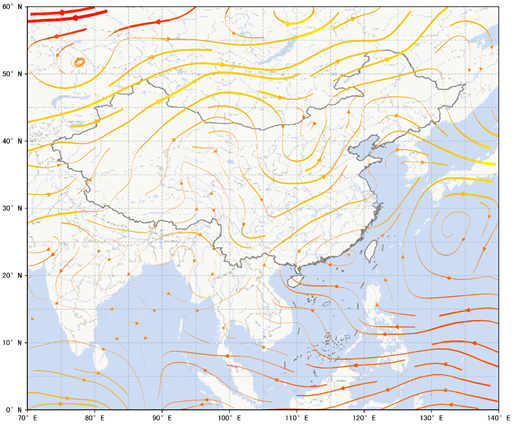

### 风矢

```python
#绘制风场（风矢）
uv=plt.quiver(lons[::2,::2],lats[::2,::2],u[::2,::2],v[::2,::2],
              color='k',units='dots',scale=0.5, regrid_shape=20,transform=proj)
#绘制风矢标
plt.quiverkey(uv, 0.93,-0.05, 20, label='20m/s', labelpos='S',transform=proj)
'''
    ·基础参数[x,y,u,v]：即经度、纬度、u分量、v分量
	·units：{'width', 'height', 'dots', 'inches', 'x', 'y' 'xy'}, default: 'width'。箭头尺寸（长度除外）以该单位的倍数计量。
	·angles：{'uv', 'xy'} ，确定箭头角度的方法，默认为'uv'。
	·scale：每个箭头长度单位的数据数，例如，每个绘图宽度的m/s；较小的比例参数使箭头变长。默认为“无”。
	·width：风矢宽度，典型的起始值约为绘图宽度的0.005倍。
	·headwidth：箭头的宽度。
    ·headlength：箭头的长度。
    ·pivot:{'tail','mid','middle','tip'}，风矢量中心点位置，默认为tip。
    ·regrid_shape：cartopy.mpl.geoaxes.GeoAxes重载后的参数。针对非等距数据，如果给定，则将风场插值到投影空间中的等距规则网格上，再绘制风矢量。
    ·target_extent：cartopy.mpl.geoaxes.GeoAxes重载后的参数。定义regrid_shape操作的范围。默认为地图投影的当前范围。
    
    quiver()方法返回值赋值给uv，传递到quiverkey()中，可以在绘图区上的 (0.93,-0.05)位置，绘制一个20m/s风矢量的标尺，在其南侧标注“20m/s”，作为定量分析风矢量的参考。

'''

```

# 地理信息

- 地理信息很重要
- 地理信息很广泛
- **正确使用地理信息**
- 正是有了Cartopy，实现了CRS转换，才得以把气象数据、测绘数据绘制到一个CRS上。

## [Natural Earth](https://www.naturalearthdata.com/features/)在线资源

<img src='pics/Cartopy/NaturalEarth.png' width=50%>

     ☀ Natural Earth Vector comes in ESRI shapefile format, the de facto standard for vector geodata. Character encoding is UTF-8.
     ☀ Natural Earth Raster comes in TIFF format with a TFW world file.
     ☀ All Natural Earth data use the Geographic coordinate system (projection), WGS84 datum

    初次叠加这些信息时，会提示“Downloading:http://naiscdn.org/naturalearth/…/…/…*.zip”
    从官方提供的数据源下载到本地目录C:\users\用户\.local\share\cartopy\shapefiles\natural_earth下，再显示到图形当中。
    再次使用直接从本地读取。
    如果受到IP等网络限制，可从http://www.naturalearthdata.com/downloads/直接下载对应压缩文件，解压到对应目录即可，并批量去掉文件名中的'ne_'。

### Cartopy提供的方法1：geoaxes子类的方法

In [ ]:
ax.coastlines('110m'，color='k')   #可选50m、10m分辨率
#从Natural Earth dataset在线获取对应分辨率的海岸线条。

### Cartopy提供的方法2：cartopy.feature - add_feature

In [ ]:
import cartopy.feature as cfeature
ax.add_feature(cfeature.BORDERS.with_scale('50m'))                  #国家地区边界。中分辨率,10m高分
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))                #海岸线
ax.add_feature(cfeature.RIVERS.with_scale('50m'),linewidths=2)      #河流
ax.add_feature(cfeature.LAKES,color='b')                            #湖泊 低分辨率
railroads=cfeature.NaturalEarthFeature('cultural','railroads','10m',facecolor='None')
ax.add_feature(railroads,edgecolor='gray')                          #铁路
###urban_areas=cfeature.NaturalEarthFeature('cultural','urban_areas','10m')  ###最近网不好！！！！！！！
###ax.add_feature(urban_areas, edgecolor='m')                          #城市 ###最近网不好！！！！！！！

## 国家地理信息公共服务平台“天地图”服务

Cartopy自带有Google、MapQuest、Stamen、Mapbox、Quadtree等多家图层服务

在国内，调用天地图的服务是方便且最有保证的途径。国家地理信息公共服务平台“天地图”（以下简称“天地图”）是国家基础地理信息中心建设的网络化地理信息共享与服务门户，集成了来自国家、省、市（县）各级测绘地理信息部门，以及相关政府部门、企事业单位 、社会团体、公众的地理信息公共服务资源，向各类用户提供权威、标准、统一的在线地理信息综合服务。

首先需要在天地图官方网站注册并升级为开发者账户，以获得天地图API及服务接口调用的开发许可（Key，类似其他API开发中的令牌Token）。可以通过修改Anaconda3\Lib\site-packages\cartopy\io\img_tiles.py，继承重写cartopy提供的GoogleWTS类，自定义天地图图层的类，从而使用天地图的服务。

<img src='pics/Cartopy/TDT.png' width=70%>

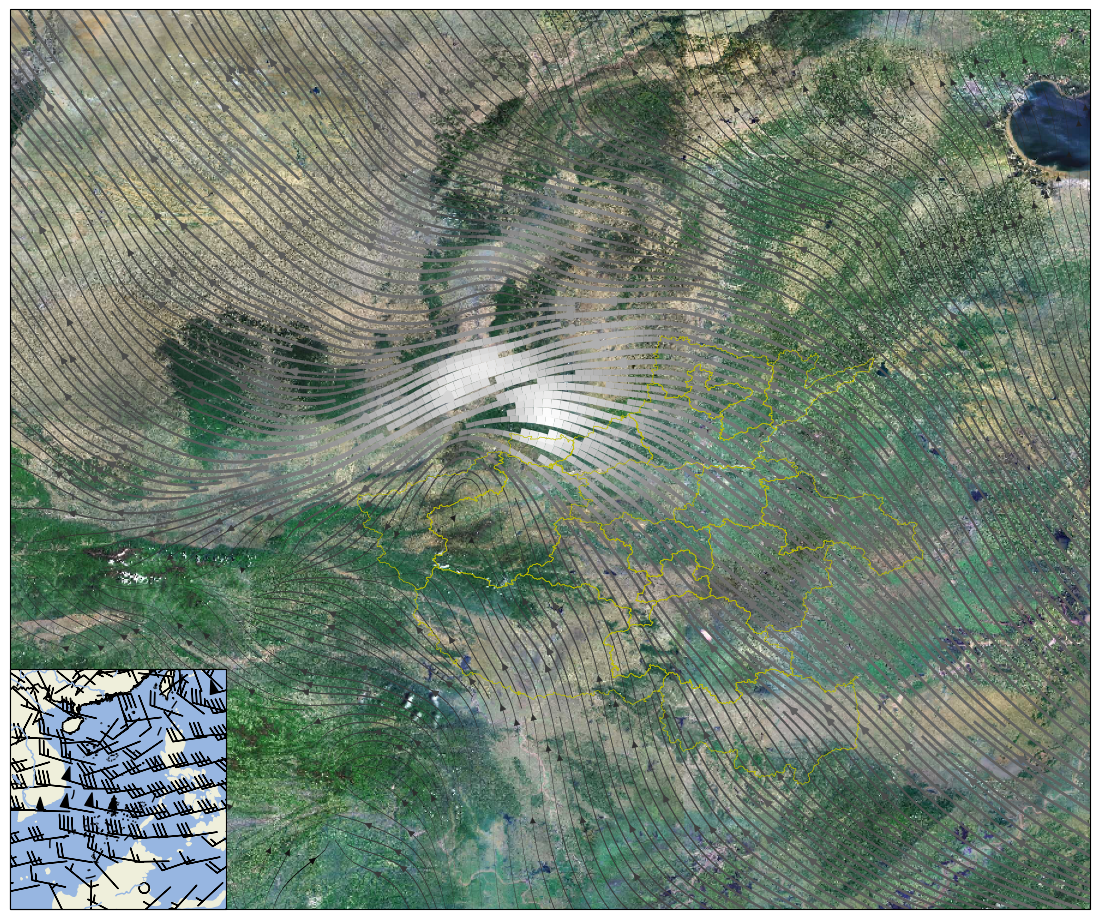

In [9]:
## 引用部分
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from PIL import Image

## 数据准备
# 打开ERA5 hourly data on pressure levels from 1979 to present数据，文件格式为GRIB1
ds = xr.open_dataset('data/ERA5-20210720.grib')#,engine = 'cfgrib')
valid = "2021-07-20T08:00:00.000000000"
lon =np.arange(70,140,0.25)
lat =np.arange(0,70,0.25)
u = ds.u.sel(time= valid, isobaricInhPa=850,longitude=lon,latitude=lat)
v = ds.v.sel(time= valid, isobaricInhPa=850,longitude=lon,latitude=lat)


# ##绘制图形
fig=plt.figure(figsize=(12,10),dpi=100)                   #画布第一
proj = ccrs.PlateCarree()                       #源投影方式：数据所具备的投影方式
#绘图区声明
ax = plt.axes([0.05,0.05,0.9,0.9], projection= ccrs.PlateCarree())             #增加projection参数
region = [106.5,118.5,30,40]                           #河南 lon1,lon2,lat1,lat2
ax.set_extent(region,crs=proj)                    #需要配置相应的crs，否则出来的地图范围不准确。如果未给出crs，则范围坐标系将假定为该轴投影的大地测量版本。

#绘制风场（流线）
plt.streamplot(lon,lat,u.data,v.data,density=4,
              linewidth=np.sqrt(u.data**2,v.data**2)*0.3,
              color=u.data,cmap='binary',
              arrowsize=1, arrowstyle='-|>',transform=proj)  
# ax.gridlines(crs=proj,ylocs=np.arange(-10,90,10),xlocs=np.arange(0,190,5),draw_labels=False,linestyle='--',alpha=0.7)
# ax.set_xticks(np.arange(70,150,10),crs=proj)

## 地理信息 
## 1-在线海岸线
# ax.coastlines(resolution='110m')
## 2-在线粗地形
# ax.stock_img() #本质上是叠加一张图片 'raster', 'natural_earth','50-natural-earth-1-downsampled.png' 。 ax.stock_img(name='ne_shaded') 还有蓝色弹珠
## 3-天地图
# request = cimgt.TDT()      #矢量图层
request = cimgt.TDT_img()    #影像
# request = cimgt.TDT_ter()  #地形
# request = cimgt.TDT_BD()   #全球境界不行
ax.add_image(request,8)      # level=10 缩放等级 
## 4-本地图片
# Image.MAX_IMAGE_PIXELS = None
# fname = 'shp/natural-earth-1_large8192px.png'
# ax.imshow(plt.imread(fname), origin='upper', alpha=0.9,extent=[-180, 180, -90, 90],transform=proj)

shpname=r'shp\city.shp'
adm1_shapes=list(Reader(shpname).geometries())
ax.add_geometries(adm1_shapes[151:168],ccrs.PlateCarree(),edgecolor='y',facecolor='None',linewidth=0.5,zorder=4)  #zorder 1是最底层……

#绘制小南海地图  #!!!本例中十段线未涉及！！！方案①带有十段线的shp  方案②按照经纬度添加绘制线条
sub_ax = fig.add_axes([0.04, 0.05, 0.2, 0.24],projection=ccrs.LambertConformal(central_latitude=90,central_longitude=115))
sub_ax.set_extent([105, 125, 0, 25])
cs = sub_ax.barbs(lon[::10],lat[::10],u.data[::10,::10],v.data[::10,::10],transform=proj,barb_increments={'half':2, 'full':4, 'flag':20}) 
# 添加在线地理信息
sub_ax.add_feature(cfeature.OCEAN.with_scale('50m'))
sub_ax.add_feature(cfeature.LAND.with_scale('50m'))
sub_ax.add_feature(cfeature.RIVERS.with_scale('50m'))
sub_ax.add_feature(cfeature.LAKES.with_scale('50m'))
# 5-离线shp文件
shp_path = 'shp/NationalBorder.shp'
NationalBorder = cfeature.ShapelyFeature(Reader(shp_path).geometries(),proj, edgecolor='k', facecolor='none')
sub_ax.add_feature(NationalBorder, linewidth=1, zorder=2)

##显示输出
plt.show()

## 本地地理信息

    ☀ 地理信息是地理数据所蕴含和表达的地理含义，是与地理环境要素有关的物质的数量、质量、性质、分布特征、联系和规律的数字、文字、图像和图形等的总称。
    ☀ 气象资料本身也是与地理分布有关的，在天气预报业务和科研中时常需要将气象信息和地理信息叠加，进行综合分析。
    ☀ 常见的离线的地理信息TIFF、PNG、JPEG图片类、shapfile、geojson……
    ☀ 都有很多工具可以处理地理信息常见的格式，或者相互转换，不做展开

### 图片
1. 很多时候，地理信息资源提供方会给出图片格式（TIFF、JPEG、PNG等）的地理信息。比如[国家测绘地理信息局标准地图服务](http://bzdt.ch.mnr.gov.cn/)，有多幅不同比例、不同呈现形式、不同大小的中国地图、世界地图、专题地图，提供了JPG、EPS这两种图片格式的下载。
2. 在cartopy当中同样支持NASA提供的Blue Marble的地球卫星影像，下载到本地后，设定Cartopy底图的环境变量，使用
```python 
    ax.background_img(name='ne_shaded', resolution='low', extent=None, cache=False) 
    #还可选择灰球'ne_grey' 分辨率：'low', 'med', 'high', 'vhigh', 'full'
```
3. 在6.1.1当中，直接使用绘图区的
```python 
imshow(plt.imread(fname), origin='upper', alpha=0.9,transform=ccrs.PlateCarree(),extent=[-180, 180, -90, 90])
```
将原本为等经纬度投影、全球高分辨彩色地形图叠加到兰勃托投影图像中。

     **以上针对图片（一般都是等经纬度）的，关键要知道“四至”**

4. 除了以上介绍的添加shapefile和图片的方法外，cartopy还提供了add_image、add_raster、natural_earth_shp、stock_img用以向地图上添加各种不同格式的信息，读者可根据官方文档手册进行学习使用。

In [ ]:
Image.MAX_IMAGE_PIXELS = None
fname = r'shp\natural-earth-1_large8192px.png'
fig1 = plt.figure()
ax1 = fig1.add_axes([0.05,0.05,0.9,0.9],projection=ccrs.PlateCarree())
ax1.background_img(name='ne_shaded', resolution='low', extent=[100, 125, 30, 45], cache=False)
plt.show()

In [ ]:
Image.MAX_IMAGE_PIXELS = None
fname = r'shp\natural-earth-1_large8192px.png'
fig1 = plt.figure()
ax1 = fig1.add_axes([0.05,0.05,0.9,0.9],projection=ccrs.PlateCarree())
ax1.imshow(plt.imread(fname), origin='upper', alpha=0.9,transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax1.set_extent([100, 125, 30, 45])

### Shapefile
Shapefile，全称ESRI Shapefile，扩展名为shp，是美国环境系统研究所公司（ESRI）开发的一种空间数据开放格式。该文件格式已经成为了地理信息软件界的一个开放标准。实际上该种文件格式是由多个文件组成的。其中，要组成一个Shapefile，有三个文件是必不可少的，它们分别是".shp", ".shx"与 ".dbf"文件。
 - 点、线、面、信息
 - 很多工具，Cartopy只是其一

In [ ]:
# 选择性忘掉ArcGIS吧……
import geopandas
bou2_4l = geopandas.read_file(r'shp\bou2_4l.shp')
bou2_4l
# type(bou2_4l)

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,9),dpi=150)
ax = fig.add_subplot(111,projection=ccrs.LambertConformal(central_latitude=35,central_longitude=110,standard_parallels=(30,60)))
ax.set_extent([70,140,0,65])
ax.add_geometries(bou2_4l['geometry'],crs=ccrs.PlateCarree(),facecolor='None',edgecolor='b',lw=2)
ax.gridlines()
plt.show()

In [ ]:
#从全国市级地图中获取辽宁省的市级边界并加载
from cartopy.io.shapereader import Reader
fig = plt.figure(figsize=(9,9),dpi=150)
ax = fig.add_subplot(111,projection=ccrs.LambertConformal(central_latitude=35,central_longitude=110,standard_parallels=(30,60)))
ax.set_extent([70,140,0,65])

shpname=r'shp\city.shp'
adm1_shapes=list(Reader(shpname).geometries())
ax.add_geometries(adm1_shapes[36:50],ccrs.PlateCarree(),edgecolor='k',facecolor='None',linewidth=0.1)  #36:72东三省 
ax.gridlines()
plt.show()

## *突出显示某个行政区*

见"21-科学分析方法的Python实现.ipynb" 3.2. 二维插值部分

---
1. <font color='red'>地图</font>上<font color='blue'>等值线分析</font>
2. <font color='red'>**crs projection   .VS.   transform**</font>
3. <font color='blue'>等值线填色</font> - **色彩映射**的故事
4. <font color='blue'>风场的三种形态</font> = 风向杆、风矢量、流场
5. <font color='red'>地理信息</font> = 在线 + 离线(*突出*)